In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [36]:
# Q1: Does the incidents increase over time?
# Q2: Does the amount of leaked accouts increase as the number of incident increase?
# Q3: What are the top incidents?
# Q4: Are their any companies that got hacked twice?
# Q5: What is the ranking of the asset classes in these incidents?
# Q6: Does any months has more incidents or more leaks than the others across the years?
br = pd.read_json('breaches.json')
br.shape

(479, 15)

In [37]:
br.head()

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26T23:35:45Z,2017-12-10T21:44:27Z,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, IP addresses, Names, Passwords]",True,False,False,False,False
1,126,126,126.com,2012-01-01,2016-10-08T07:46:05Z,2016-10-08T07:46:05Z,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, Passwords]",False,False,False,False,False
2,17Media,17,17app.co,2016-04-19,2016-07-08T01:55:03Z,2016-07-08T01:55:03Z,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Device information, Email addresses, IP addre...",True,False,False,False,False
3,17173,17173,17173.com,2011-12-28,2018-04-28T04:53:15Z,2018-04-28T04:53:15Z,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, Passwords, Usernames]",False,False,False,False,False
4,2844Breaches,"2,844 Separate Data Breaches",,2018-02-19,2018-02-26T10:06:02Z,2018-02-26T10:06:02Z,80115532,"In February 2018, <a href=""https://www.troyhun...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, Passwords]",False,False,False,False,False


In [38]:
# see if we need to drop null
br.isnull().sum()

Name            0
Title           0
Domain          0
BreachDate      0
AddedDate       0
ModifiedDate    0
PwnCount        0
Description     0
LogoPath        0
DataClasses     0
IsVerified      0
IsFabricated    0
IsSensitive     0
IsRetired       0
IsSpamList      0
dtype: int64

In [39]:
# removed fabricated breaches
np.sum(br.IsFabricated), np.sum(br.IsVerified), np.sum(br.IsSensitive), np.sum(br.IsRetired), np.sum(br.IsSpamList)

(2, 448, 36, 1, 11)

In [40]:
# Only use IsFabricated == False and drop the IsFabricated column 
br2 = br[br.IsFabricated == False]
br2.drop('IsFabricated', axis=1, inplace=True)
br2.shape

/home/oscp/jupyter_notebook/my_project_env/lib/python3.6/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(477, 14)

In [41]:
# Only use IsVerified == False and drop the IsFabricated column 
br3 = br2[br2.IsVerified == True]
br3.drop('IsVerified', axis=1, inplace=True)
br3.shape

/home/oscp/jupyter_notebook/my_project_env/lib/python3.6/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(448, 13)

In [42]:
np.sum(br3.IsSensitive), np.sum(br3.IsRetired), np.sum(br3.IsSpamList)

(30, 1, 11)

In [43]:
br3

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsSensitive,IsRetired,IsSpamList
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26T23:35:45Z,2017-12-10T21:44:27Z,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, IP addresses, Names, Passwords]",False,False,False
2,17Media,17,17app.co,2016-04-19,2016-07-08T01:55:03Z,2016-07-08T01:55:03Z,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Device information, Email addresses, IP addre...",False,False,False
5,2fast4u,2fast4u,2fast4u.be,2017-12-20,2018-01-07T08:19:39Z,2018-01-07T08:19:39Z,17706,"In December 2017, the Belgian motorcycle forum...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, Passwords, Usernames]",False,False,False
6,500px,500px,500px.com,2018-07-05,2019-03-25T08:01:09Z,2019-03-25T08:01:09Z,14867999,"In mid-2018, the online photography community ...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Dates of birth, Email addresses, Genders, Geo...",False,False,False
8,8fit,8fit,8fit.com,2018-07-01,2019-03-21T18:50:00Z,2019-03-21T18:50:00Z,15025407,"In July 2018, the health and fitness service <...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, Genders, Geographic location...",False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,Zooville,Zooville,zooville.org,2019-09-27,2019-10-19T21:22:44Z,2019-10-20T21:58:16Z,71407,"In September 2019, the zoophilia and bestialit...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Dates of birth, Email addresses, IP addresses...",True,False,False
475,Zynga,Zynga,zynga.com,2019-09-01,2019-12-19T04:54:45Z,2020-01-11T00:41:51Z,172869660,"In September 2019, game developer <a href=""htt...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, Passwords, Phone numbers, Us...",False,False,False
476,Parapa,Пара Па,parapa.mail.ru,2016-08-08,2016-12-28T07:03:17Z,2016-12-28T07:03:17Z,4946850,"In August 2016, <a href=""http://www.zdnet.com/...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, Passwords, Usernames]",False,False,False
477,SprashivaiRu,Спрашивай.ру,sprashivai.ru,2015-05-11,2015-05-12T23:50:08Z,2015-05-12T23:50:08Z,3474763,"In May 2015, <a href=""http://sprashivai.ru/"" t...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Dates of birth, Email addresses, Genders, Geo...",False,False,False


In [44]:
# lets start with the time range of the data
br3.BreachDate.min(), br3.BreachDate.max(), type(br3.BreachDate.min())

('2007-07-12', '2020-08-19', str)

In [45]:
br3['BreachDate'] = pd.to_datetime(br3['BreachDate'])
br3['BreachYear'] = br3['BreachDate'].dt.year
br3['BreachYear']

/home/oscp/jupyter_notebook/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/oscp/jupyter_notebook/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0      2015
2      2016
5      2017
6      2018
8      2018
       ... 
474    2019
475    2019
476    2016
477    2015
478    2020
Name: BreachYear, Length: 448, dtype: int64

[Text(0.5, 0, 'Year of the Breach'), Text(0, 0.5, 'Number of Breaches')]

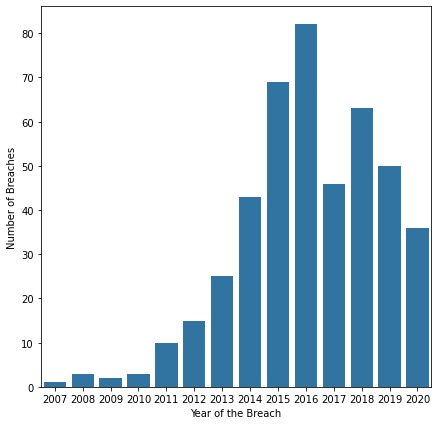

In [46]:
# Q1: Does the incidents increase over time?
# We plot the number of breaches by year and we have the following observations
# 1. The number of breaches increases over time from 2007. However, this only indicates the number of breaches 
# disclosed increases which is different from the number of total breaches happened.
# 2. The number of breaches reaches its peak in 2016.
base_color = sb.color_palette()[0]
plt.rcParams["figure.figsize"] = (7, 7)
ax = sb.countplot(data = br3, x = 'BreachYear', color = base_color)
ax.set(xlabel='Year of the Breach', ylabel='Number of Breaches')

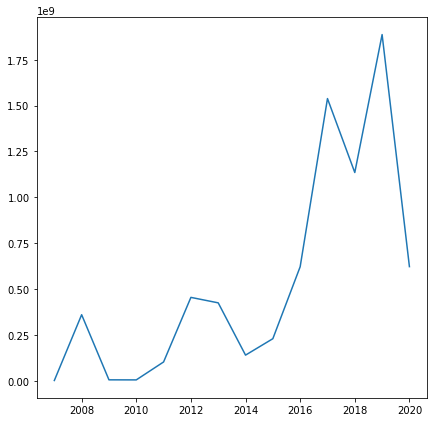

In [47]:
# plot the total PwnCount by year
#pwn_per_year = br3.groupby('BreachYear')['PwnCount'].sum()
pwn_per_year = br3.groupby('BreachYear')['PwnCount'].sum()
#pwn_per_year.reset.index()
plt.plot(pwn_per_year)

In [48]:
breach_count = br3['BreachYear'].value_counts(sort=False)
breach_count = pd.DataFrame(breach_count).reset_index(drop=True)
breach_count.columns = ['BreachCount']
breach_count

,BreachCount
0,1
1,3
2,2
3,3
4,10
5,15
6,25
7,43
8,69
9,82


In [49]:
#column_names = ['BreachYear', 'PwnCount']
type(pwn_per_year)
pwn_per_year = pd.DataFrame(pwn_per_year).reset_index()
pwn_per_year['BreachCount'] = breach_count['BreachCount']
pwn_per_year

,BreachYear,PwnCount,BreachCount
0,2007,2136520,1
1,2008,360519656,3
2,2009,5774783,2
3,2010,5458476,3
4,2011,103213872,10
5,2012,454971060,15
6,2013,425178472,25
7,2014,140411867,43
8,2015,229895646,69
9,2016,621856584,82


[Text(0.5, 0, 'Total number of Breaches by Year'),
 Text(0, 0.5, 'Total number of Leaked Accounts by Year')]

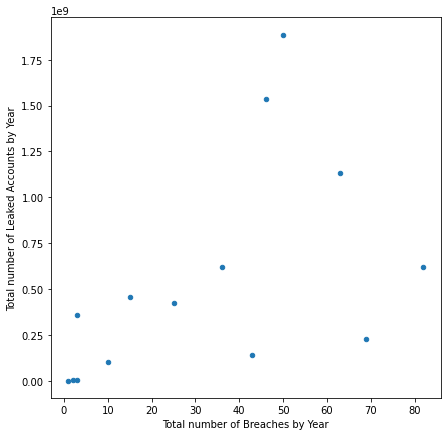

In [50]:
# Q2: Does the amount of leaked accouts increase as the number of incident increase?
# We can see the number of account that is leaked does not always correlate to the number of data breaches 
# because the some data breaches leaks much more accounts than the others
ax = pwn_per_year.plot.scatter(x='BreachCount', y='PwnCount')
ax.set(xlabel='Total number of Breaches by Year', ylabel='Total number of Leaked Accounts by Year')

In [51]:
# What are the top data breaches ranked by number of compromised accounts, i.e., PwnCount
br_top_9 = br3[br3['PwnCount'] > br3.PwnCount.quantile(0.98)]
br_top_9

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsSensitive,IsRetired,IsSpamList,BreachYear
16,AdultFriendFinder2016,Adult FriendFinder (2016),adultfriendfinder.com,2016-10-16,2020-02-06T23:53:53Z,2020-02-07T01:11:28Z,169746810,"In October 2016, the adult entertainment compa...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, Passwords, Spoken languages,...",True,False,False,2016
110,PDL,Data Enrichment Exposure From PDL Customer,,2019-10-16,2019-11-22T20:13:04Z,2019-11-22T20:13:04Z,622161052,"In October 2019, <a href=""https://www.troyhunt...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, Employers, Geographic locati...",False,False,False,2019
238,LinkedIn,LinkedIn,linkedin.com,2012-05-05,2016-05-21T21:35:40Z,2016-05-21T21:35:40Z,164611595,"In May 2016, <a href=""https://www.troyhunt.com...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, Passwords]",False,False,False,2012
285,MySpace,MySpace,myspace.com,2008-07-01,2016-05-31T00:12:29Z,2016-05-31T00:12:29Z,359420698,"In approximately 2008, <a href=""http://motherb...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, Passwords, Usernames]",False,False,False,2008
305,OnlinerSpambot,Onliner Spambot,,2017-08-28,2017-08-29T19:25:56Z,2017-08-29T19:25:56Z,711477622,"In August 2017, a spambot by the name of <a hr...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, Passwords]",False,False,True,2017
348,RiverCityMedia,River City Media Spam List,rivercitymediaonline.com,2017-01-01,2017-03-08T23:49:53Z,2017-03-08T23:49:53Z,393430309,"In January 2017, <a href=""https://web.archive....",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, IP addresses, Names, Physica...",False,False,True,2017
426,VerificationsIO,Verifications.io,verifications.io,2019-02-25,2019-03-09T19:29:54Z,2019-03-09T20:49:51Z,763117241,"In February 2019, the email address validation...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Dates of birth, Email addresses, Employers, G...",False,False,False,2019
441,Wattpad,Wattpad,wattpad.com,2020-06-29,2020-07-19T22:49:19Z,2020-07-19T22:49:19Z,268765495,"In June 2020, the user-generated stories websi...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Bios, Dates of birth, Email addresses, Gender...",False,False,False,2020
475,Zynga,Zynga,zynga.com,2019-09-01,2019-12-19T04:54:45Z,2020-01-11T00:41:51Z,172869660,"In September 2019, game developer <a href=""htt...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, Passwords, Phone numbers, Us...",False,False,False,2019


In [52]:
br_top_9 = br_top_9[['Name', 'PwnCount']]
br_top_9=br_top_9.sort_values('PwnCount')
br_top_9

,Name,PwnCount
238,LinkedIn,164611595
16,AdultFriendFinder2016,169746810
475,Zynga,172869660
441,Wattpad,268765495
285,MySpace,359420698
348,RiverCityMedia,393430309
110,PDL,622161052
305,OnlinerSpambot,711477622
426,VerificationsIO,763117241


Text(0, 0.5, 'Number of Accounts Leaked (x $10^8$)')

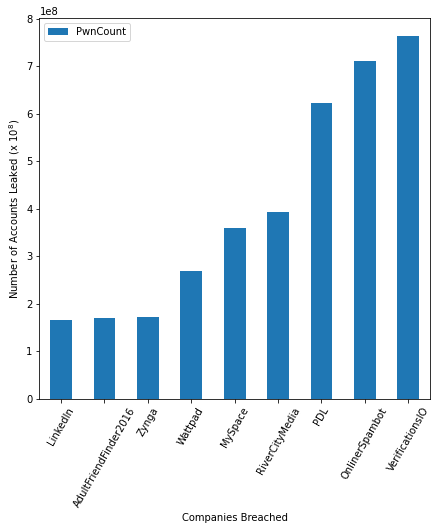

In [53]:
# Q3: What are the top incidents?
x_unit = np.arange(br_top_9.PwnCount.max(), step=1e8)
br_top_9.plot.bar(x='Name', y='PwnCount', rot=60)
plt.xlabel('Companies Breached')
plt.ylabel('Number of Accounts Leaked (x $10^8$)')

In [54]:
# Q4: Are their any companies that got hacked twice?
com = set()
twice = list()
for i in br3['Name']:
    if i in com:
        twice.append(i)
    else:
        com.add(i)

twice

[]

In [55]:
# check if there is any data input errors for duplicates by edit distance
import nltk

com = set()
twice = set()
for i in br3['Name']:
    for j in com:
        if nltk.edit_distance(i, j) <= 2:
            twice.add(i)
            twice.add(j)
    else:
        com.add(i)

twice

{'AKP',
 'Adapt',
 'Avast',
 'Bell',
 'Bolt',
 'DDO',
 'DLH',
 'Edmodo',
 'Elance',
 'Elanic',
 'Evony',
 'GoGames',
 'HackForums',
 'IGF',
 'Lifebear',
 'Lifeboat',
 'MGM',
 'MPGH',
 'MacForums',
 'Nulled',
 'NulledCH',
 'OVH',
 'PDL',
 'QIP',
 'R2Games',
 'SkTorrent',
 'Sony',
 'Tamodo',
 'Tout',
 'VK',
 'VNG',
 'uTorrent'}

In [56]:
# They both looks like hacking community. But it is not completely clear if they are the same entity although the
# TLD both are in the structure of null.<>
null = br3[(br3['Name'] == 'Nulled') | (br3['Name'] == 'NulledCH')]
print(null.iloc[0,7], '\n\n', null.iloc[1,7])

In May 2020, the hacking forum <a href="https://www.nulled.ch/" target="_blank" rel="noopener">Nulled.ch</a> was breached and the data published to a rival hacking forum. Over 43k records were compromised and included IP and email addresses, usernames and passwords stored as salted MD5 hashes alongside the private message history of the website's admin. The data was provided to HIBP by a source who requested it be attributed to &quot;Split10&quot;. 

 In May 2016, the cracking community forum known as <a href="http://nulled.cr/" target="_blank" rel="noopener">Nulled.cr</a> was hacked and 599k user accounts were leaked publicly. The compromised data included email and IP addresses, weak salted MD5 password hashes and hundreds of thousands of private messages between members.


In [57]:
# Q5: What is the ranking of breached asset classes in these incidents?
import itertools
import collections

def freq_sorted(iterable, key=None, reverse=False, include_freq=False):
  """Return a list of items from iterable sorted by frequency.

  If include_freq, (item, freq) is returned instead of item.

  key(item) must be hashable, but items need not be.

  *Higher* frequencies are returned first.  Within the same frequency group,
  items are ordered according to key(item).
  """
  if key is None:
    key = lambda x: x

  key_counts = collections.defaultdict(int)
  items = {}
  for n in iterable:
    k = key(n)
    key_counts[k] += 1
    items.setdefault(k, n)

  if include_freq:
    def get_item(k, c):
      return items[k], c
  else:
    def get_item(k, c):
      return items[k]

  return [get_item(k, c) for k, c in
          sorted(key_counts.items(),
                 key=lambda kc: (-kc[1], kc[0]),
                 reverse=reverse)]


#set(itertools.chain.from_iterable(br3.DataClasses))
asset_map = freq_sorted(itertools.chain.from_iterable(br3.DataClasses), include_freq=True)
asset_map

[('Email addresses', 443),
 ('Passwords', 370),
 ('Usernames', 272),
 ('IP addresses', 208),
 ('Names', 183),
 ('Dates of birth', 116),
 ('Phone numbers', 103),
 ('Physical addresses', 82),
 ('Genders', 77),
 ('Website activity', 74),
 ('Geographic locations', 60),
 ('Private messages', 24),
 ('Employers', 20),
 ('Social media profiles', 19),
 ('Job titles', 18),
 ('Purchases', 14),
 ('Spoken languages', 14),
 ('Security questions and answers', 11),
 ('Device information', 10),
 ('Browser user agent details', 9),
 ('Email messages', 8),
 ('Government issued IDs', 8),
 ('Instant messenger identities', 8),
 ('Partial credit card data', 8),
 ('Account balances', 7),
 ('Marital statuses', 7),
 ('Avatars', 6),
 ('Ethnicities', 6),
 ('Income levels', 6),
 ('Payment histories', 6),
 ('Physical attributes', 6),
 ('Auth tokens', 5),
 ('Bios', 5),
 ('Credit cards', 5),
 ('Education levels', 5),
 ('Salutations', 5),
 ('Sexual orientations', 5),
 ('Social connections', 5),
 ('Time zones', 5),
 ('U

In [58]:
asset_df = pd.DataFrame(asset_map)
asset_df.columns = ['asset', 'count']
asset_df=asset_df.sort_values('count', ascending=False)
asset_df

,asset,count
0,Email addresses,443
1,Passwords,370
2,Usernames,272
3,IP addresses,208
4,Names,183
...,...,...
88,Encrypted keys,1
89,Financial investments,1
91,Health insurance information,1
92,Home loan information,1


<AxesSubplot:ylabel='asset'>

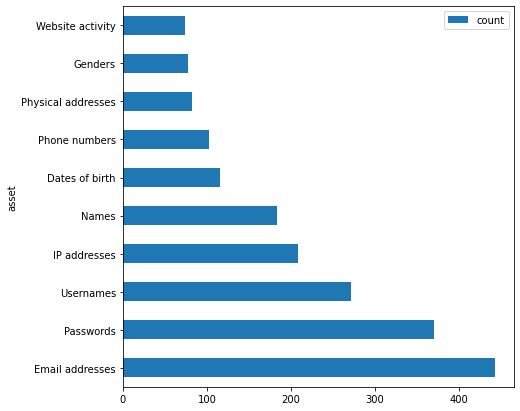

In [59]:
asset_df_top10 = asset_df[:10]
asset_df_top10.plot.barh(x='asset', y='count')

In [60]:
# Q6: Does any months has more incidents than the others across the years?
br3['BreachMonth'] = br3['BreachDate'].dt.month
br3['BreachMonth']

/home/oscp/jupyter_notebook/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       3
2       4
5      12
6       7
8       7
       ..
474     9
475     9
476     8
477     5
478     3
Name: BreachMonth, Length: 448, dtype: int64

In [61]:
# calculate the aggreate incident count by unique year-month combination
br_year_month = br3.groupby(['BreachYear','BreachMonth']).size().reset_index(name='YearMonthCount')
br_year_month

,BreachYear,BreachMonth,YearMonthCount
0,2007,7,1
1,2008,4,1
2,2008,7,1
3,2008,10,1
4,2009,1,2
...,...,...,...
106,2020,4,4
107,2020,5,1
108,2020,6,12
109,2020,7,2


/home/oscp/jupyter_notebook/my_project_env/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/oscp/jupyter_notebook/my_project_env/lib/python3.6/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(0.0, 13.0)

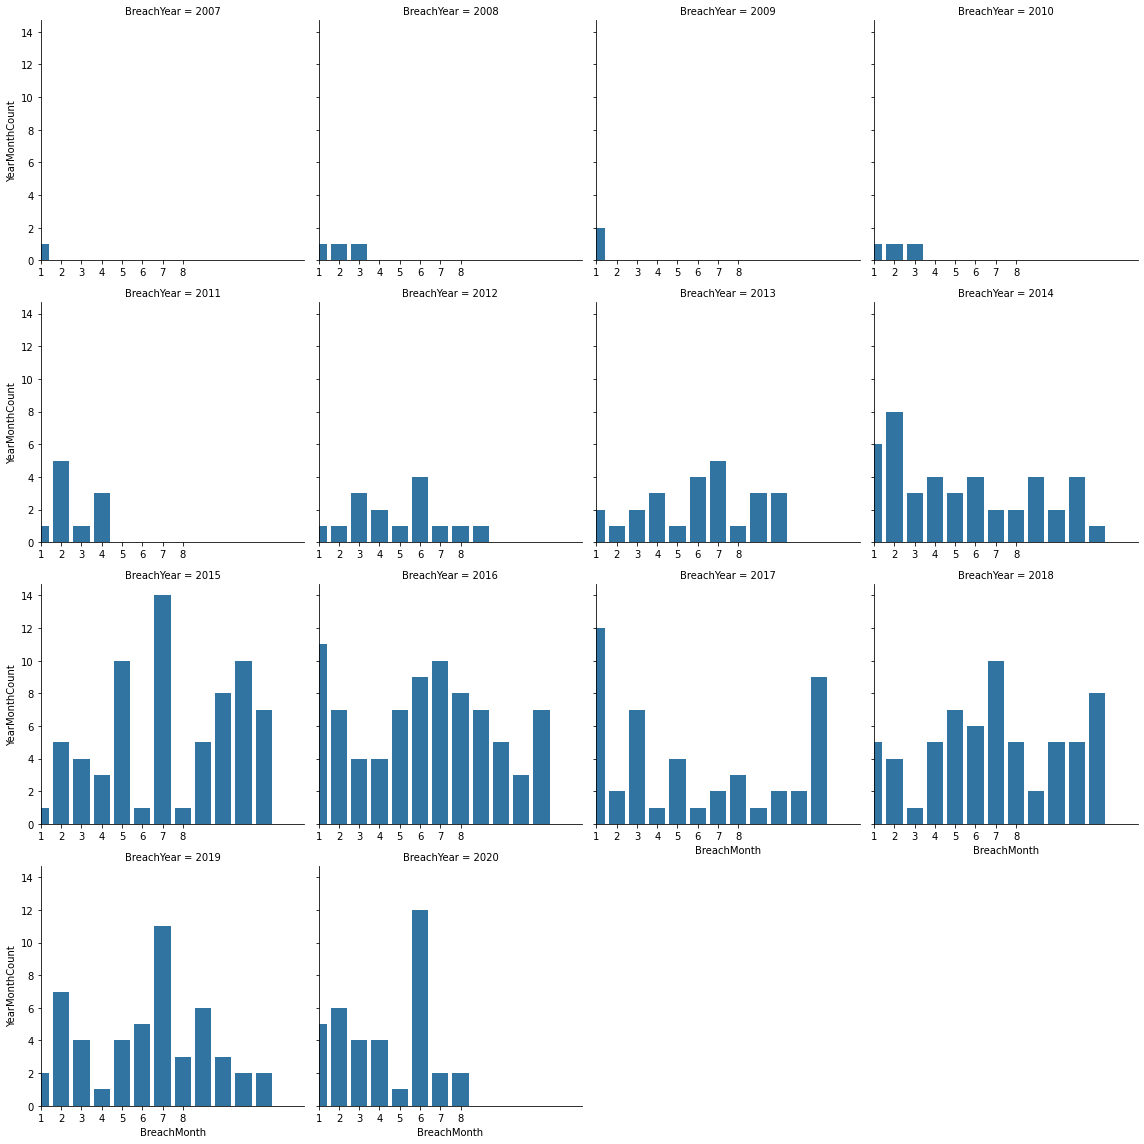

In [62]:
# we can roughly observe that jun/jul 
g = sb.FacetGrid(data = br_year_month, col = 'BreachYear', size = 4, col_wrap=4, margin_titles = True)
g.map(sb.barplot, 'BreachMonth', 'YearMonthCount')
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

plt.xlim(0, 13)    

/home/oscp/jupyter_notebook/my_project_env/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


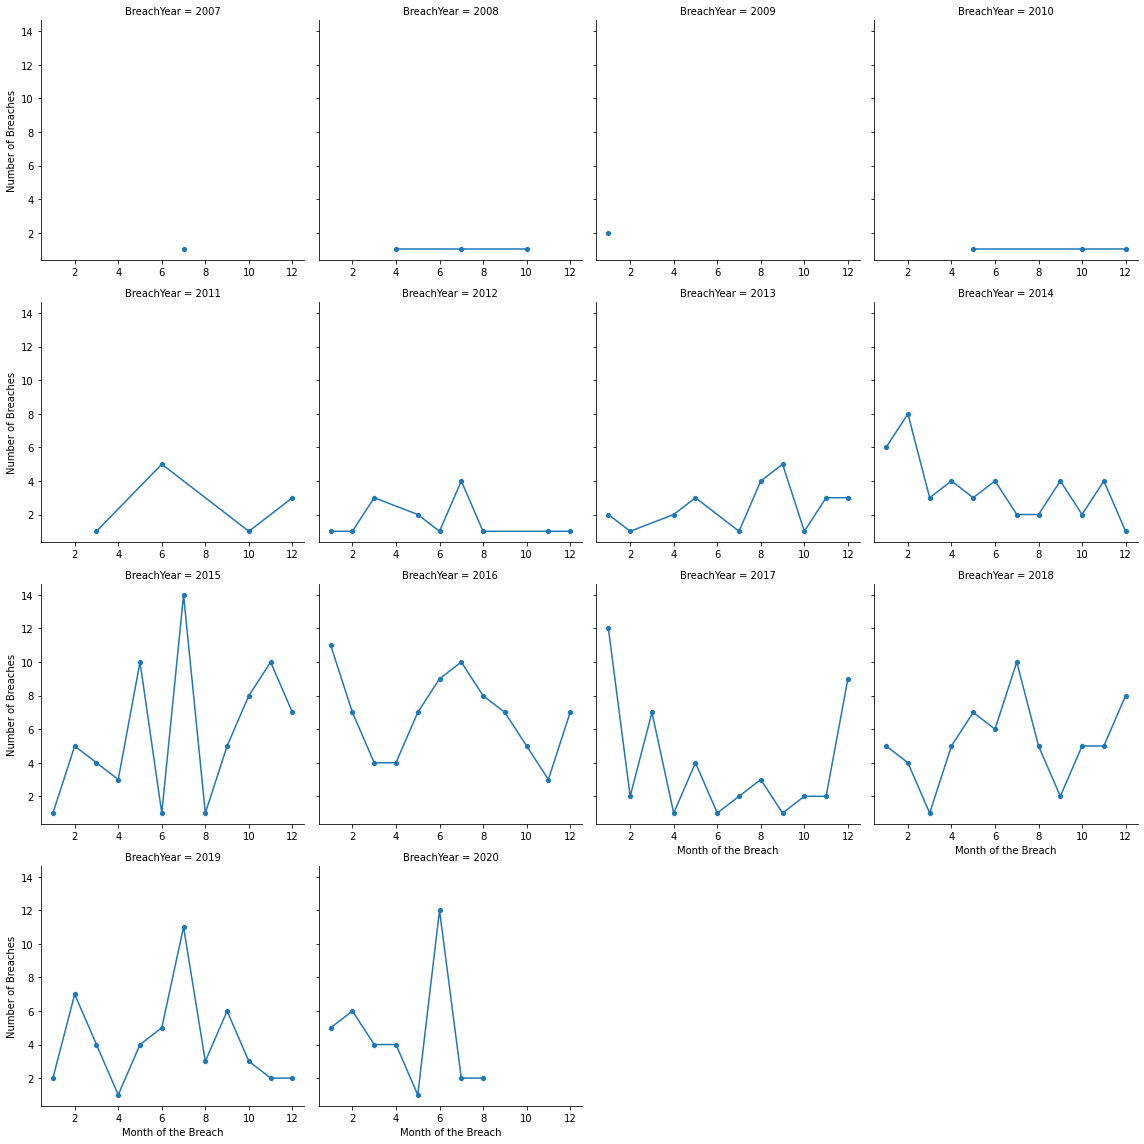

In [65]:
g = sb.FacetGrid(data = br_year_month, col = 'BreachYear', size = 4, col_wrap=4, margin_titles = True)
# Overlay line plot on top of scatter plot because lineplot does not splot a single dot 
# and scatter splot cannot show the trend clearly
g.map(sb.lineplot, 'BreachMonth', 'YearMonthCount')
g.map(sb.scatterplot, 'BreachMonth', 'YearMonthCount')
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
    ax.set(xlabel='Month of the Breach', ylabel='Number of Breaches')
